> SAÉ 2.04 - Exploitation d'une base de données  
> Auteurs : LEFRANCOIS Thibaut & DEMOUGE Colin  
> Date : 05/05/2023  
---
## Notebook 4 : Taux de réservation par type de chambre, par mois et par hôtel

#### Import des composants pour la connexion à la base de données

In [1]:
import cx_Oracle
import db_config

#### Connexion à la base de données

In [2]:
vconnect = cx_Oracle.connect(db_config.user, db_config.pwd, db_config.dsn)

#### Requête
Requête SQL qui retourne le nombre de chambres réservées par type de chambre dans un hôtel spécifique `v_id_hotel` pour un mois donné `v_mois`

In [3]:
query = """
        SELECT t.TYPE_CHAMBRE, COUNT(r.CHAMBRE) AS "Nombre de chambres réservées"
        FROM RESERVATION_CHAMBRE r
        JOIN CHAMBRE c ON r.CHAMBRE = c.ID_CHAMBRE
        JOIN TYPE_CHAMBRE t ON c.TYPE = t.ID_TYPE_CHAMBRE
        WHERE c.HOTEL = :v_id_hotel AND
        EXTRACT(MONTH FROM r.ARRIVEE) = :v_mois
        GROUP BY t.TYPE_CHAMBRE
        ORDER BY t.TYPE_CHAMBRE
        """

Cette requête récupère des informations sur le nombre de réservations par chambre dans un hôtel spécifique, identifié par la variable liée `:v_id_hotel`, pour un mois donné, identifié par la variable liée `:v_mois`.

La requête effectue des jointures entre les tables `RESERVATION_CHAMBRE`, `CHAMBRE` et `TYPE_CHAMBRE` pour obtenir les informations sur le type de chambre associé à chaque réservation.

Elle utilise la fonction `COUNT` pour compter le nombre de chambres réservées par type de chambre.

La clause `WHERE` est utilisée pour filtrer les résultats en ne prenant en compte que les réservations effectuées dans l'hôtel spécifié et pour le mois spécifié.

Enfin, la requête groupe les résultats par type de chambre en utilisant la clause `GROUP BY` sur la colonne `t.TYPE_CHAMBRE`. Les résultats sont ensuite triés par ordre croissant sur la colonne `t.TYPE_CHAMBRE`.

### Visualisation des données récupérées

Installation (si nécéssaire) puis importation de la librairie `matplotlib` pour visualiser les données sous forme de diagrammes. 

In [4]:
!pip install matplotlib
import matplotlib.pyplot as plot

### Définition des fonctions nécessaires à la visualisation

In [5]:
# Création des listes pour les données x et y
x_data = []
y_data = []

# Fonction pour exécuter la requête SQL et stocker les résultats dans des listes
def execute_query(id_hotel, mois):
    vcursor = cx_Oracle.Cursor(vconnect)
    vcursor.execute(query, v_id_hotel=id_hotel, v_mois=mois)
    x_data.clear()
    y_data.clear()
    for row in vcursor.fetchall():
        x_data.append(row[0])
        y_data.append(row[1])
    vcursor.close()

# Fonction pour initialiser le graphique
def init_plot():
    plot.rcParams["figure.figsize"] = [30, 20]
    plot.subplots_adjust(wspace=0.5)

# Fonction pour ajouter les données au plot
def add_data_plot(mois):
    plot.subplot(3, 4, mois)
    plot.pie(y_data, labels=x_data, autopct='%1.1f%%')
    plot.title(f"Répartition des réservations pour chacun des type de l'hotel {id_hotel} au mois {mois}")



### Exécution de la requête et visualisation du résultat : une seule visualisation

In [10]:
# Initialisation du graphique
init_plot()

# Boucle sur les identifiants d'hôtel de 1 à 3
for id_hotel in range(1, 4):
    # Boucle sur les mois de 1 à 3
    for mois in range(1, 4):
        # Exécution de la requête SQL avec l'identifiant de l'hôtel et le mois actuels
        execute_query(id_hotel, mois)
        # Ajout des données à l'affichage du graphique
        add_data_plot(mois)
    # Affichage du graphique pour l'hôtel actuel
    plot.show()


InterfaceError: not connected

<Figure size 2160x1440 with 0 Axes>

#### Exécution de la requête et visualisation du résultat : une visualisation annuel pour un hôtel donné

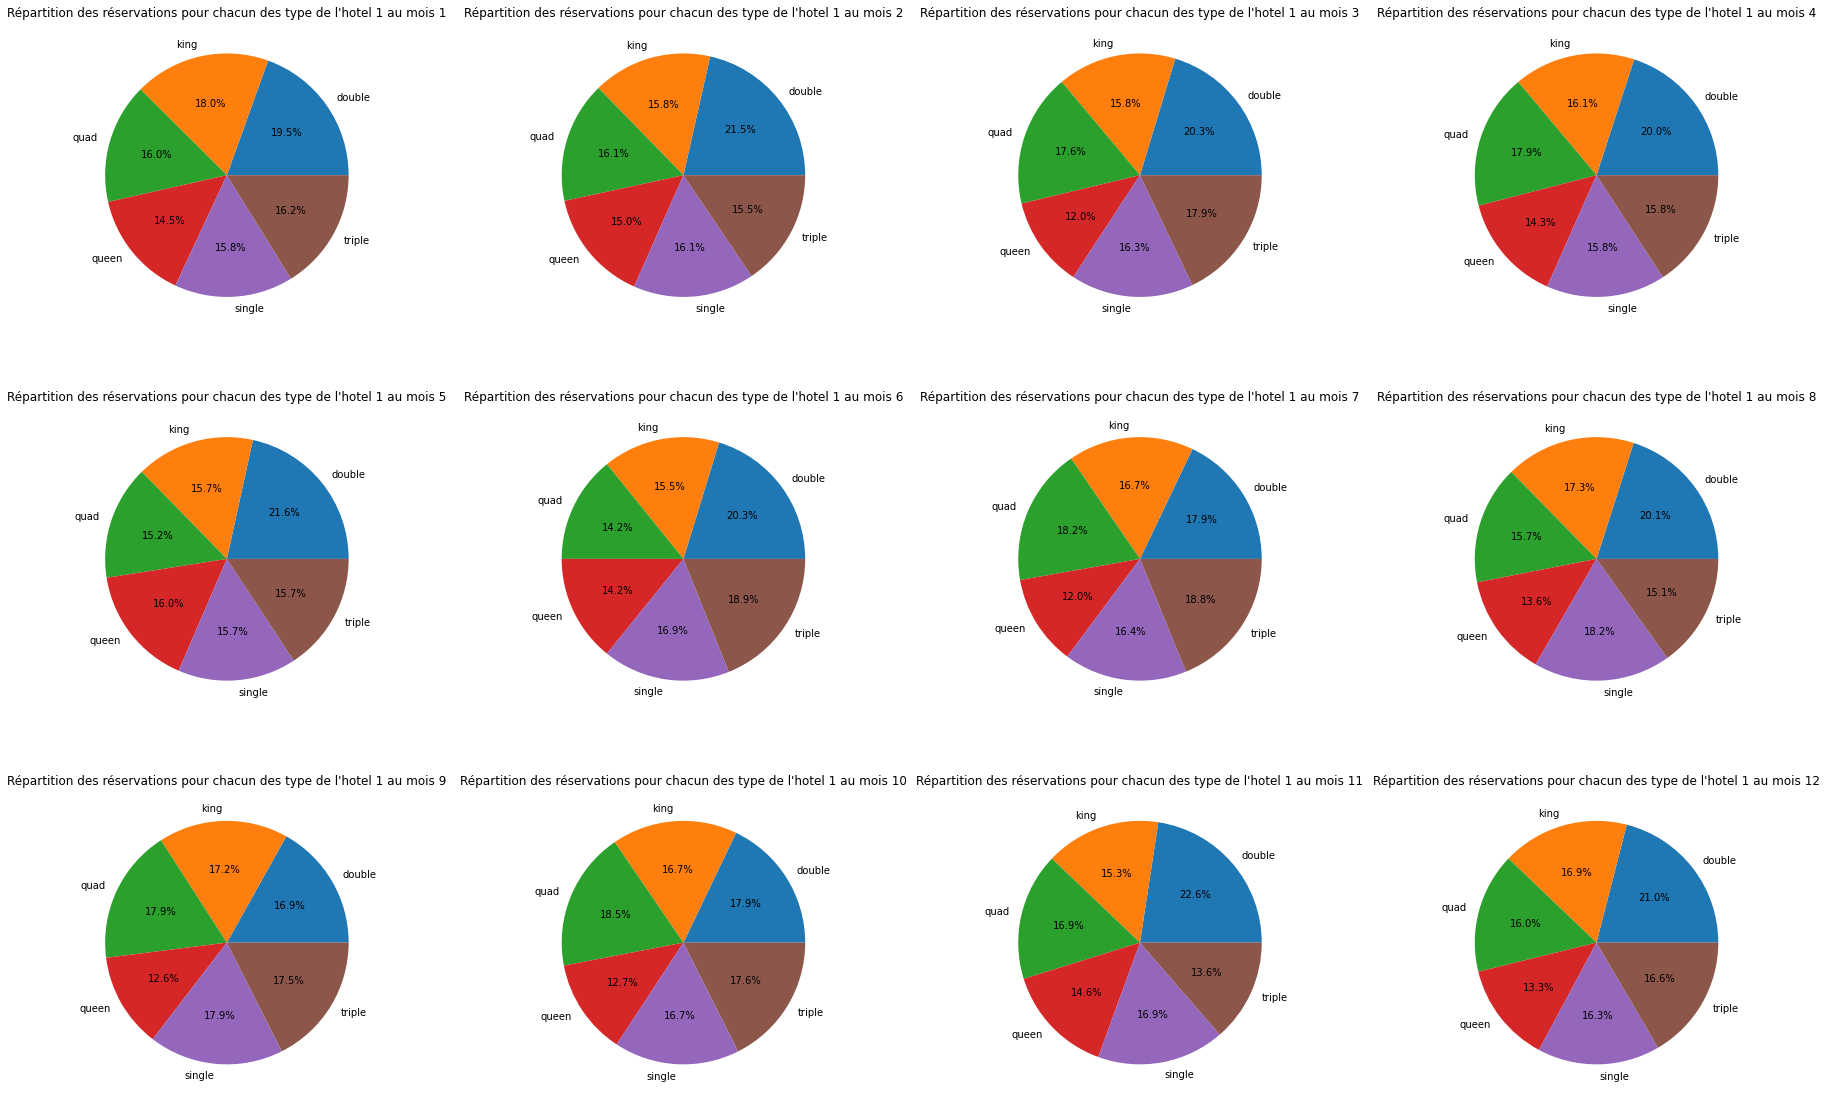

In [7]:
# Initialisation du graphique et de l'hôtel
init_plot()
id_hotel = 1

# Boucle sur les mois de 1 à 12
for mois in range(1, 13):
    
    # Exécution de la requête SQL avec l'identifiant de l'hôtel et le mois actuels
    execute_query(id_hotel, mois)
    
    # Ajout des données à l'affichage du graphique
    add_data_plot(mois)
    
# Affichage du graphique pour l'hôtel actuel
plot.show()


#### Exécution de la requête et visualisation du résultat : une visualisation pour un mois et un hôtel donné

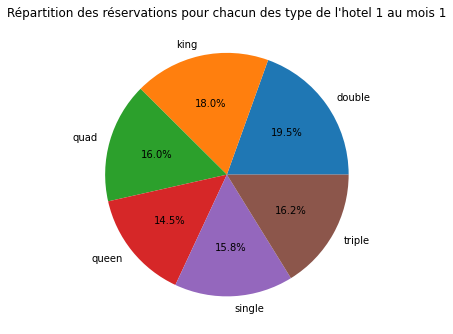

In [8]:
# Initialisation du graphique, de l'hôtel et du mois
init_plot()
id_hotel = 1
mois = 1

# Exécution de la requête SQL avec l'identifiant de l'hôtel et le mois actuels
execute_query(id_hotel, mois)

# Ajout des données à l'affichage du graphique
add_data_plot(mois)
    
# Affichage du graphique pour l'hôtel actuel
plot.show()


### Fin de l'exécution de la requête

In [9]:
vconnect.close()